Series

The first main data type we will learn about for pandas is the Series data type.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

In [1]:

import numpy as np

import pandas as pd

Creating a Series

You can convert a list,numpy array, or dictionary to a Series:

In [2]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30]) 
d = {'a':10,'b':20,'c':30}

In [3]:
pd.Series(data=my_list) 

0    10
1    20
2    30
dtype: int64

In [4]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [8]:

pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

In [9]:
# NumPy Arrays
pd.Series(arr) 

0    10
1    20
2    30
dtype: int32

In [10]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

In [13]:
d

{'a': 10, 'b': 20, 'c': 30}

In [14]:
# Dictionary    
pd.Series(d)

a    10
b    20
c    30
dtype: int64

Data in a Series

A pandas Series can hold a variety of object types:

In [15]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [16]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

Using an Index

The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

In [17]:

ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])    

In [18]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])         

In [13]:
#Operations are then also done based off of index:

ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. 

In [4]:
from numpy.random import randn

In [5]:
randn(5,4)

array([[ 0.03519956,  1.38425867,  0.11483289,  1.08947569],
       [-1.51249668, -1.42554415, -0.87216736,  0.01342077],
       [-0.88983922,  0.42542553,  2.59111302, -0.97909527],
       [-0.39202545, -0.77259551, -0.95023597,  0.71479652],
       [ 1.40590787,  0.14365314, -0.89187114, -0.33982443]])

In [8]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df

,W,X,Y,Z
A,-0.764979,-0.064230,-1.774101,0.678755
B,0.377178,-1.403131,2.428847,-0.346211
C,0.487266,-0.683783,0.870767,0.150003
D,0.940898,0.715069,-1.421545,-0.301769
E,-0.911555,0.049243,2.286981,0.184578


Selection and Indexing

In [12]:
# Pass a list of column names

df[['W','Z']] 


,W,Z
A,-0.764979,0.678755
B,0.377178,-0.346211
C,0.487266,0.150003
D,0.940898,-0.301769
E,-0.911555,0.184578


In [23]:
type(df['W'])

pandas.core.series.Series

In [24]:
type(df)

pandas.core.frame.DataFrame

Creating a new column:



In [13]:
df['new'] = df['W'] + df['Y'] 
df

,W,X,Y,Z,new
A,-0.764979,-0.064230,-1.774101,0.678755,-2.539080
B,0.377178,-1.403131,2.428847,-0.346211,2.806025
C,0.487266,-0.683783,0.870767,0.150003,1.358033
D,0.940898,0.715069,-1.421545,-0.301769,-0.480647
E,-0.911555,0.049243,2.286981,0.184578,1.375426


Removing Columns

In [20]:
df.drop("W",inplace = True) 

df

KeyError: "['W'] not found in axis"

In [21]:
df

,W,X,Y,Z,new
C,0.487266,-0.683783,0.870767,0.150003,1.358033
D,0.940898,0.715069,-1.421545,-0.301769,-0.480647
E,-0.911555,0.049243,2.286981,0.184578,1.375426


In [22]:
df.drop('new',axis=1,inplace=True)
df

,W,X,Y,Z
C,0.487266,-0.683783,0.870767,0.150003
D,0.940898,0.715069,-1.421545,-0.301769
E,-0.911555,0.049243,2.286981,0.184578


In [92]:
df.drop('E',axis=0)  # axis = 0 --> row/ Horizontal, 1--> column/vertical


,W,X,Y,Z
A,-0.151383,-0.032644,1.516984,-1.221725
B,0.685453,0.308983,-0.146425,-0.045857
C,1.409350,-0.432540,-0.630350,-0.248103
D,2.653666,0.300173,-0.365593,1.573234


Selecting Rows

In [25]:
df["W"]

C    0.487266
D    0.940898
E   -0.911555
Name: W, dtype: float64

In [27]:
df.loc['C'] 

W    0.487266
X   -0.683783
Y    0.870767
Z    0.150003
Name: C, dtype: float64

In [28]:
#select based off  position instead of label

df.iloc[0]

W    0.487266
X   -0.683783
Y    0.870767
Z    0.150003
Name: C, dtype: float64

Selecting subset of rows and columns

In [29]:
df.loc['C']['Y']

0.8707668961937102

In [39]:
df

,W,X,Y,Z
B,0.320918,0.420738,4.000000,0.144252
C,0.349919,-0.084737,1.076270,-1.261803
D,0.186513,-0.736464,-0.272331,-0.701575
E,-1.479589,-0.914731,0.946562,-0.296135


In [30]:

df.loc[['C','D'],['W','Y']] 

,W,Y
C,0.487266,0.870767
D,0.940898,-1.421545


Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [43]:
df

,W,X,Y,Z
A,-0.687204,-0.219939,0.616695,-1.204582
B,-0.206364,-0.756054,-1.668157,-0.897444
C,0.090542,0.655113,-1.710707,0.594147
D,0.090279,1.164907,2.273522,0.012561
E,0.286375,0.627693,1.601830,-1.330048


In [31]:

df>0

,W,X,Y,Z
C,True,False,True,True
D,True,True,False,False
E,False,True,True,True


In [32]:
df[df>0] 

,W,X,Y,Z
C,0.487266,NaN,0.870767,0.150003
D,0.940898,0.715069,NaN,NaN
E,NaN,0.049243,2.286981,0.184578


In [34]:
df[df['W']>0]["W"]

C    0.487266
D    0.940898
Name: W, dtype: float64

In [47]:
df[df['W']>0]  

,W,X,Y,Z
C,0.090542,0.655113,-1.710707,0.594147
D,0.090279,1.164907,2.273522,0.012561
E,0.286375,0.627693,1.601830,-1.330048


In [48]:
df[df['W']>0]['Y']   

C   -1.710707
D    2.273522
E    1.601830
Name: Y, dtype: float64

In [41]:
df[df['W']>0][['Y','X']]

,Y,X
B,4.000000,0.420738
C,1.076270,-0.084737
D,-0.272331,-0.736464


For two conditions you can use | and & with parenthesis:

In [50]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z
D,0.090279,1.164907,2.273522,0.012561
E,0.286375,0.627693,1.601830,-1.330048


In [44]:
df.columns

Index(['W', 'X', 'Y', 'Z'], dtype='object')

In [47]:
df["index_1"] = df.index
df

,W,X,Y,Z,index_1
B,0.320918,0.420738,4.000000,0.144252,B
C,0.349919,-0.084737,1.076270,-1.261803,C
D,0.186513,-0.736464,-0.272331,-0.701575,D
E,-1.479589,-0.914731,0.946562,-0.296135,E


In [43]:
# Reset to default 0,1...n index
df.reset_index() 

,index,W,X,Y,Z
0,B,0.320918,0.420738,4.000000,0.144252
1,C,0.349919,-0.084737,1.076270,-1.261803
2,D,0.186513,-0.736464,-0.272331,-0.701575
3,E,-1.479589,-0.914731,0.946562,-0.296135


In [53]:
newind = 'CA NY WY OR CO'.split()
newind 

['CA', 'NY', 'WY', 'OR', 'CO']

In [54]:
df['States'] = newind

In [55]:
df

,W,X,Y,Z,States
A,1.071608,-0.936699,-1.748520,-0.256832,CA
B,-0.675987,-1.822779,-1.217246,-0.189426,NY
C,0.355192,-1.022583,-2.838563,-0.631562,WY
D,0.871979,-1.471923,1.243912,0.901374,OR
E,-0.615097,1.528155,0.191119,-0.085754,CO


In [109]:
df.set_index('States',inplace= True)

In [110]:
df

,W,X,Y,Z
States,,,,
CA,-0.151383,-0.032644,1.516984,-1.221725
NY,0.685453,0.308983,-0.146425,-0.045857
WY,1.409350,-0.432540,-0.630350,-0.248103
OR,2.653666,0.300173,-0.365593,1.573234
CO,-1.162492,0.377230,-1.991781,-0.557671


Merging, Joining, and Concatenating

There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating. 

In [56]:
import pandas as pd

In [35]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [36]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [37]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [39]:
pd.concat([df1,df2,df3],axis = 0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use pd.concat and pass in a list of DataFrames to concatenate together:

In [53]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,NaN,D8
9,A9,B9,NaN,D9


In [54]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,D9


In [40]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

Merging

The merge function allows you to merge DataFrames together using a similar logic as merging SQL Tables together

In [41]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [42]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [44]:
right.drop(2,axis = 0,inplace =True)

In [45]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
3,K3,C3,D3


In [47]:
pd.merge(right,left,how='right',on='key')

,key,C,D,A,B
0,K0,C0,D0,A0,B0
1,K1,C1,D1,A1,B1
2,K2,NaN,NaN,A2,B2
3,K3,C3,D3,A3,B3


In [46]:
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K3,A3,B3,C3,D3


In [46]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [47]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [48]:

pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [49]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [50]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


Joining

Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [51]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [52]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [53]:

left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


Missing Data

In [63]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [65]:
df


,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [66]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [67]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [67]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [68]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1.0,5.0,1
1,2.0,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [78]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

Operations

There are lots of operations with pandas that will be really useful to you, but don't fall into any distinct category.

In [70]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


Info on Unique Values

In [71]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [72]:
df['col2'].nunique()

3

In [73]:
pd.DataFrame(df['col2'].value_counts())

,col2
444,2
555,1
666,1


Selecting Data

In [83]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [84]:
newdf

,col1,col2,col3
3,4,444,xyz


Applying Functions

In [85]:
def times2(x):
    return x*2

In [89]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [69]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [70]:
df['col1'].sum()

10

Permanently Removing a Column

In [71]:
del df['col1']

In [72]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


Get column and index names:

In [73]:

df.columns

Index(['col2', 'col3'], dtype='object')

In [74]:

df.index

RangeIndex(start=0, stop=4, step=1)

Sorting and Ordering a DataFrame:

In [90]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [91]:
df.sort_values(by='col2') #inplace=False by default

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


Find Null Values or Check for Null Values

In [92]:
df.isnull()

,col1,col2,col3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


In [93]:
# Drop rows with NaN Values
df.dropna()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


Filling in NaN values with something else:

In [94]:

df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [95]:

df.fillna('FILL')


,col1,col2,col3
0,1.0,FILL,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,FILL,444.0,xyz


(array([2., 1., 0., 0., 0., 1., 2., 1., 2., 1.]),
 array([-21.01271167, -18.15685191, -15.30099215, -12.44513239,
         -9.58927262,  -6.73341286,  -3.8775531 ,  -1.02169334,
          1.83416642,   4.69002619,   7.54588595]),
 <BarContainer object of 10 artists>)

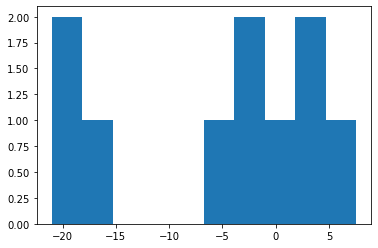

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

arr = np.random.normal(1,10,size=10 )
fig, ax = plt.subplots()
ax.hist(arr)

In [97]:
data = [
    {"Name": "Asabeneh", "Country":"Finland","City":"Helsinki"},
    {"Name": "David", "Country":"UK","City":"London"},
    {"Name": "John", "Country":"Sweden","City":"Stockholm"}]
df = pd.DataFrame(data)
print(df)

       Name  Country       City
0  Asabeneh  Finland   Helsinki
1     David       UK     London
2      John   Sweden  Stockholm


In [83]:
# Using functions makes our code clean, but you can calculate the bmi without one
def calculate_bmi ():
    weights = df['Weight']
    heights = df['Height']
    bmi = []
    for w,h in zip(weights, heights):
        b = w/(h*h)
        bmi.append(b)
    return bmi
    
bmi = calculate_bmi()

KeyError: 'Weight'

In [ ]:
df['BMI'] = bmi
df

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [1]:
a  = 4
b  = 4
a == b

True

In [7]:
a = 5
b = 5
a is b

True

In [6]:
b = 5
a is b

True

In [8]:
a = [x for x in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
74 not in a

True

In [26]:
d = {}
for i in range(10):
    d[i] = 1
d

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}

In [30]:
df = pd.DataFrame(columns=["user"])

In [28]:

df 

,user
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
